EDA

# Exploring Data

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

# import datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission = pd.read_csv('sample_solution.csv')

In [ ]:
train_df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.108590,0.004314,-37.566000,0.017364,0.289150,-10.251000,135.120000,168900.000000,399240000000000.000000,86.489000,0.598810,1423200000.000000,0.272400,9.455600,-0.050305,1938.300000,8.633100,4.060700,26.867000,-1.180000,10961.000000,1.539700,135.320000,-1.496500,440.080000,2590100000000.000000,2194200000.000000,2968800.000000,0.001431,13.327000,0.750500,18509.000000,146820.000000,-0.000276,10906000000000000.000000,1705.400000,414.290000,3.539200,1888.000000,0.968930,18.388000,-0.001583,7.705900,5.932500,0.025693,4.560400,0.611220,10.795000,0.341930,0.235010,NaN,5237.700000,1.296100,163.660000,0.403780,0.188600,-0.001446,-0.354160,6.643200,0.305340,0.514020,1907300000.000000,29.861000,0.965010,1797.200000,72.178000,108.620000,1.979900,1.290700,0.995190,1.322800,827.340000,777990000000000.000000,41299000000.000000,0.006994,6.983500,43956.000000,1978.200000,5.508400,-0.001081,6.124400,123180000000.000000,275.920000,5308500.000000,1704.000000,50224000000.000000,53.398000,-2.201200,6871.000000,3.886200,-0.005580,5252.100000,166.690000,1.607400,0.665340,7768.900000,0.996620,112570000000.000000,2.243200,0.934160,0.650560,94569.000000,21.471000,8214.100000,0.288010,0.097826,0.001071,1412400000.000000,0.110930,-12.228000,1.748200,1.909600,-7.115700,4378.800000,1.209600,861340000000000.000000,140.100000,1.017700,1
1,1,0.100900,0.299610,11822.000000,0.276500,0.459700,-0.837330,1721.900000,119810.000000,3874100000000000.000000,9953.600000,1.209300,3334100000.000000,0.286310,-0.012858,-0.019912,10.284000,6.187200,1.041900,4.640400,31.877000,123620.000000,1.395100,125.810000,1.198900,136.450000,9098100000.000000,40041000000.000000,1564000.000000,0.000204,3.107400,1.503300,238000.000000,21440.000000,-0.001344,30794000000000000.000000,229.100000,844.820000,1.468000,4726.500000,0.915380,-1.532100,0.982600,7.111200,2.079700,0.042321,4.252300,0.418710,5.449900,0.012737,0.386470,7.308200,283.210000,-0.925520,140.800000,0.247390,-0.001656,-0.000975,-0.226290,2.424600,0.771470,0.011613,1803700000.000000,64.604000,0.262650,4455.000000,78.339000,745.510000,2.906900,1.482600,1.005100,1.497400,84.446000,3505600000000000.000000,2242300000.000000,0.896300,4.674900,17713.000000,9003.100000,-4.354600,0.254100,6.919100,183240000000.000000,9.651000,32800.000000,1480.600000,23006000000.000000,44.051000,205.690000,4295.300000,13.388000,0.468430,754.610000,83.233000,1.189000,29.550000,7343.700000,0.998150,48777000000000.000000,1.270800,-0.000969,5.295200,6779.000000,227.720000,34.342000,0.340300,0.143370,0.049276,1903200000.000000,0.976730,-56.758000,4.168400,0.348080,4.142000,913.230000,1.246400,7575100000000000.000000,1861.000000,0.283590,0
2,2,0.178030,-0.006980,907.270000,0.272140,0.459480,0.173270,2298.000000,360650.000000,12245000000000.000000,15827.000000,0.381640,1230300000.000000,0.258070,2.455600,NaN,26.873000,7.546300,1.996700,1.952600,817.760000,-2948.700000,2.005400,1.682600,1.196800,74.624000,-32739000000.000000,57189000000.000000,11058.000000,-0.003097,8.024100,1.131800,27940.000000,862460.000000,-0.002207,58491000000000.000000,-897.840000,NaN,1.356100,3063.400000,0.086232,16.106000,0.001481,11.476000,5.343000,0.012162,4.101800,-0.882700,8.122800,-0.676690,0.337700,-1.073200,4097.000000,13.458000,159.240000,0.322300,0.560090,0.000455,-0.160830,3.575300,0.609700,0.028301,527130000.000000,14.454000,0.115490,14605.000000,36.992000,-9.639100,64.267000,NaN,0.992780,2.589100,430.400000,-44535000000000.000000,5144900000000.000000,0.099591,6.551600,1887.500000,43319.

In [3]:
train_df.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
count,957919.000000,942672.000000,942729.000000,942428.000000,942359.000000,942514.000000,942398.000000,942415.000000,942546.000000,942670.000000,942696.000000,942494.000000,942326.000000,942455.000000,942697.000000,942410.000000,942475.000000,942492.000000,942594.000000,942445.000000,942464.000000,942465.000000,942641.000000,942563.000000,942289.000000,942413.000000,942561.000000,942475.000000,942654.000000,942504.000000,942527.000000,942241.000000,942390.000000,942427.000000,942671.000000,942585.000000,942556.000000,942607.000000,942485.000000,942360.000000,942551.000000,942523.000000,942503.000000,942464.000000,942456.000000,942436.000000,942286.000000,942396.000000,942473.000000,942539.000000,942357.000000,942487.000000,942604.000000,942457.000000,942494.000000,942497.000000,942452.000000,942346.000000,942464.000000,942519.000000,942359.000000,942488.000000,942401.000000,942509.000000,942341.000000,942505.000000,942505.000000,942433.000000,942300.000000,942367.000000,942657.000000,942437.000000,942700.000000,942382.000000,942349.000000,942463.000000,942350.000000,942668.000000,942470.000000,942541.000000,942599.000000,942573.000000,942434.000000,942292.000000,942534.000000,942470.000000,942396.000000,942603.000000,942371.000000,942474.000000,942437.000000,942412.000000,942427.000000,942462.000000,942505.000000,942320.000000,942634.000000,942654.000000,942631.000000,942485.000000,942393.000000,942570.000000,942751.000000,942319.000000,942721.000000,942533.000000,942375.000000,942535.000000,942579.000000,942390.000000,942554.000000,942420.000000,942509.000000,942686.000000,942481.000000,942360.000000,942330.000000,942512.000000,942707.000000,957919.000000
mean,478959.000000,0.090201,0.345964,4068.744207,0.201214,0.304869,-0.071458,1620.843815,377164.164157,1806053749440377.750000,5323.442367,0.729518,1844435560.081402,0.247759,6.999152,0.019394,444.804439,6.892520,4.491982,22.448660,203.782031,61070.567499,2.269597,87.166891,0.341240,414.983986,3379987643255.859863,1254164236339.915283,2256887.491631,0.329054,7.882455,0.394211,134469.988473,357905.544068,-0.000005,27823178865941924.000000,185.485192,406.072571,1.768743,1981.074344,0.359381,446.664352,0.359571,6.946628,29.761954,0.013454,4.277615,0.029221,6.378937,-0.425397,0.299912,56.638828,2683.140670,12.204214,137.373234,0.250631,0.411071,0.000012,-0.329313,3.058053,0.548762,0.273404,2469246893.886226,36.836014,0.212860,47835.926728,84.103569,608.154443,29.001846,1.212457,0.418355,1.544838,482.147786,796463977059769.125000,1063963343392.838989,0.376600,6.876209,10721.517913,10525.861146,1.555219,0.194237,3.240370,105381114265.853119,152.850973,6128693.945055,635.301741,32514136522.495438,26.598567,207.260994,3805.100719,6.733556,0.366754,4868.608259,132.264261,0.821190,13.120677,3849.687894,0.999970,14156843439109.169922,1.683151,0.425840,20.213776,321575.951426,548.647493,3855.616303,0.178027,0.160832,0.014196,1671872572.646981,0.398622,-19.926398,2.074530,23.885245,1.748777,63152.973540,1.208876,42769052891229504.000000,3959.204669,0.559267,0.498492
std,276527.540591,0.043564,0.146251,6415.829440,0.212510,0.145343,2.123777,1276.281403,345432.472849,2335204188640509.000000,10068.380032,1.495535,2125477558.021488,0.101156,6.621472,0.101880,631.327086,1.715735,3.899241,14.609968,281.015052,89859.616863,0.896001,37.350264,1.643595,314.822410,5655523939854.593750,1642736110554.133789,2303909.489554,0.433861,5.939864,0.781932,203660.525285,462667.049745,0.001534,34527073956544216.000000,701.76

In [6]:
train_df.isnull( ).sum( )

id           0
f1       15247
f2       15190
f3       15491
f4       15560
f5       15405
f6       15521
f7       15504
f8       15373
f9       15249
f10      15223
f11      15425
f12      15593
f13      15464
f14      15222
f15      15509
f16      15444
f17      15427
f18      15325
f19      15474
f20      15455
f21      15454
f22      15278
f23      15356
f24      15630
f25      15506
f26      15358
f27      15444
f28      15265
f29      15415
f30      15392
f31      15678
f32      15529
f33      15492
f34      15248
f35      15334
f36      15363
f37      15312
f38      15434
f39      15559
f40      15368
f41      15396
f42      15416
f43      15455
f44      15463
f45      15483
f46      15633
f47      15523
f48      15446
f49      15380
f50      15562
f51      15432
f52      15315
f53      15462
f54      15425
f55      15422
f56      15467
f57      15573
f58      15455
f59      15400
f60      15560
f61      15431
f62      15518
f63      15410
f64      15578
f65      15414
f66      1

In [7]:
test_df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,957919,0.165850,0.487050,1295.000000,0.023100,0.319000,0.901880,573.290000,3743.700000,2705700000000.000000,6221.000000,1.172000,5175000000.000000,0.258310,3.420500,0.044983,1001.600000,10.104000,10.536000,19.517000,-1.120900,1577.600000,2.184700,96.109000,1.153500,95.865000,2847100000000.000000,96421000000.000000,6406000.000000,0.002990,6.635300,-0.015913,21723.000000,67604.000000,-0.000227,60462000000000000.000000,203.580000,301.790000,1.346100,5524.600000,-0.003163,21.883000,0.027383,7.211300,24.825000,-0.001420,4.895000,-1.087100,7.056100,-1.061500,0.000100,1.856000,449.990000,-0.362860,160.630000,0.248010,0.623000,0.000116,-0.393840,1.903800,0.068588,0.020439,2506500000.000000,48.164000,-0.002272,78643.000000,112.360000,1021.900000,11.481000,1.157300,0.002995,1.819200,1096.800000,300410000000000.000000,2042300000.000000,0.085500,4.631200,1683.100000,9833.600000,NaN,0.510410,4.032200,247790000000.000000,69.264000,5494800.000000,1239.000000,534930000.000000,5.308600,182.590000,829.170000,5.231900,0.010301,3640.800000,112.120000,-0.434420,11.161000,3755.700000,0.999260,53382000000.000000,1.386700,-0.001878,58.794000,75657.000000,187.240000,1258.900000,0.163340,0.055398,0.020002,795640000.000000,0.162530,-22.189000,2.065500,0.430880,-10.741000,81606.000000,1.194000,198040000000000.000000,2017.100000,0.463570
1,957920,0.129650,0.373480,1763.000000,0.728840,0.332470,-1.263100,875.550000,554370.000000,595570000000000.000000,934.430000,1.897900,4905100000.000000,0.284710,2.138700,-0.034328,35.223000,6.587300,12.734000,29.590000,4.163900,31915.000000,3.115800,109.430000,-0.852200,991.370000,4700100000.000000,1618200000000.000000,967810.000000,1.021500,2.961700,0.810310,415570.000000,384720.000000,0.002243,6712900000000000.000000,228.590000,33.952000,1.493800,2067.500000,-0.002343,32.772000,0.092283,6.536300,2.077300,0.046237,4.459000,-0.840920,4.447300,-1.001200,0.003750,99.647000,8146.800000,22.504000,153.400000,0.430760,0.743010,-0.000047,-0.116920,1.654400,0.467440,0.129650,444280000.000000,38.506000,0.396220,74296.000000,93.629000,-15.691000,30.655000,1.231100,1.004400,2.248400,780.870000,121360000000000.000000,348820000000.000000,-0.000792,6.999300,2451.600000,10483.000000,-5.354400,0.067286,5.404400,246260000000.000000,810.300000,860670.000000,2165.200000,271150000.000000,10.232000,515.410000,262.710000,5.635700,0.374220,420.160000,116.230000,1.269800,0.786190,1207.000000,1.000700,20650000000000.000000,1.288800,0.248850,9.985700,16323.000000,244.460000,647.580000,0.253820,0.008800,0.018479,112060000.000000,0.815280,-1.634200,1.573600,-1.071200,11.832000,90114.000000,1.150700,43880000000000000.000000,6638.900000,0.281250
2,957921,0.120190,0.445210,736.260000,0.046150,0.296050,0.316650,2659.500000,317140.000000,397780000000000.000000,131.810000,-0.484040,3800000.000000,0.371730,0.402450,0.015119,1991.600000,6.005000,0.991900,11.949000,888.070000,887.700000,3.523700,108.140000,-1.654200,528.140000,2463600000000.000000,9005900000.000000,7259.300000,1.007400,2.612300,1.062500,-208010.000000,65708.000000,0.001391,81298000000000.000000,-84.032000,NaN,1.755600,4729.200000,0.003527,861.660000,0.902670,9.393400,58.785000,0.007244,5.664500,-0.627470,6.580600,-1.128200,0.386500,56.547000,125.360000,12.703000,147.380000,0.414370,0.519980,0.000857,-0.120650,5.411500,0.772530,0.128850,5664900000.000000,50.894000,0.378710,80045.000000,65.224000,780.210000,14.125000,1.165700,-0.001285,1.066300,432.010000,-595310000000.000000,1383400000000.000000,-0.006236,5.60520

In [8]:
test_df.isnull( ).sum( )

id         0
f1      7812
f2      7891
f3      7795
f4      7733
f5      7877
f6      7913
f7      7933
f8      7855
f9      7818
f10     7896
f11     7921
f12     8087
f13     7931
f14     7750
f15     8040
f16     7940
f17     7985
f18     8005
f19     7988
f20     7820
f21     8001
f22     7893
f23     7908
f24     7764
f25     7879
f26     8120
f27     7963
f28     7952
f29     7944
f30     7908
f31     7834
f32     7861
f33     7809
f34     7917
f35     7903
f36     7983
f37     7985
f38     7867
f39     7977
f40     8046
f41     7895
f42     7961
f43     7934
f44     7797
f45     7994
f46     8011
f47     7936
f48     8019
f49     8044
f50     8001
f51     8021
f52     7778
f53     7956
f54     8034
f55     8034
f56     8045
f57     7845
f58     7828
f59     7885
f60     8053
f61     7945
f62     7955
f63     7925
f64     8141
f65     7902
f66     7994
f67     7955
f68     8080
f69     7945
f70     7901
f71     8025
f72     8019
f73     7885
f74     7964
f75     8094
f76     7892

In [6]:
features = train_df.columns[1:-1]
target = train_df.columns[-1]

In [11]:
fig, ax = plt.subplots(12, 10, figsize=(20, 20))
for i, column in enumerate(features):
    ax[i // 10, i % 10].hist(train_df[column])
    ax[i // 10, i % 10].set_title(column)

plt.tight_layout()
plt.show()

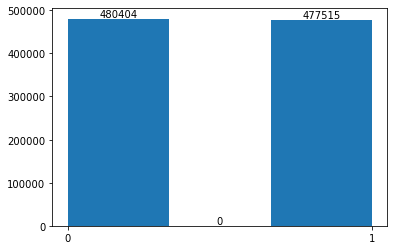

In [38]:
#plt.bar(train_df[target].unique(),train_df[target].value_counts().tolist())
counts, edges, bars = plt.hist(train_df[target],bins = 3)
plt.bar_label(bars)
plt.xticks([0, 1])
plt.show()

Informantion form data
- missing values
- target output 'claim' has binary outcomes 0 , 1
- using XGBoost model for handling missing values

XGBClassifier

In [41]:
from xgboost import XGBClassifier

X = train_df.loc[:, features]
y = train_df.loc[:, target]

model = XGBClassifier(
    max_depth=3,
    subsample=0.5,
    colsample_bytree=0.5,
    n_jobs=-1,
    # Uncomment if you want to use GPU. Recommended for whole training set.
    #tree_method='gpu_hist',
    random_state=0,
)

In [43]:
from sklearn.model_selection import cross_validate
import warnings 
warnings.filterwarnings('ignore')

def score(X, y, model, cv):
    scoring = ["roc_auc"]
    scores = cross_validate(
        model, X, y, scoring=scoring, cv=cv, return_train_score=True
    )
    scores = pd.DataFrame(scores).T
    return scores.assign(
        mean = lambda x: x.mean(axis=1),
        std = lambda x: x.std(axis=1),
    )

scores = score(X, y, model, cv=2)

display(scores)

,0,1,mean,std
fit_time,61.403732,66.141740,63.772736,2.369004
score_time,0.809834,0.828783,0.819309,0.009474
test_roc_auc,0.797381,0.796802,0.797092,0.000289
train_roc_auc,0.800838,0.801919,0.801379,0.000540


In [57]:
X_test = pd.read_csv("test.csv")
submid = X_test['id']
X_test = X_test.drop("id", axis='columns')

# Fit on full training set
model.fit(X, y)

# Make predictions
y_pred = pd.Series(
    model.predict(X_test),
    index=X_test.index,
    name=target,
)

submid['claim'] = y_pred

# Create submission file
submid.to_csv("submission.csv")


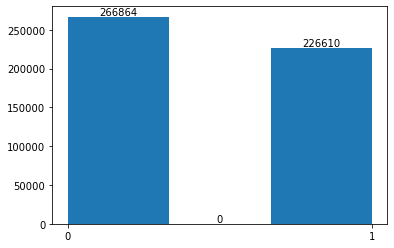

In [60]:
counts, edges, bars = plt.hist(submid['claim'],bins = 3)
plt.bar_label(bars)
plt.xticks([0, 1])
plt.show()